In [256]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [257]:
data=pd.read_csv('data2.csv',parse_dates=['Date'],header=0,squeeze=True)
header=data.columns.values.tolist()
print(header)
mask=data.isnull()
data[mask]=np.nan
data=data.fillna(method='bfill')
data['Date'] = pd.to_datetime(data['Date'])
# data.index=data['Date']
data=data.set_index(data['Date'])
# plt.plot(data,/)
# new_data=data.iloc[:,1]
# new_data

del data['Date']

train=data[:'2022/05/31']
# # print(train)
test=data['2022/06/01':]
# test

#split training test split


['Date', 'USD/INR']


In [258]:
test = test.replace(np.nan, 0)

In [259]:
test_data=list()
train_set=train.values.tolist()
test1=test.values.tolist()

In [260]:
test

,USD/INR
Date,
2022-06-01,77.57310
2022-06-02,77.41545
2022-06-03,77.68105
2022-06-04,77.61450
2022-06-05,77.61450
...,...
2022-12-27,82.81060
2022-12-28,82.75240
2022-12-29,82.83190


In [261]:
#arima_model
pred_data=list()
train_set=train.values.tolist()
test1=test.values.tolist()
# print(train_set, test1)
test.shape[0]
for t in test1:
  ar=ARIMA(train_set,order=(5, 1, 0))
  model=ar.fit()
  # print("HI")
  forcast=model.forecast()[0].tolist()
  # print(forcast)
  pred_data.append(forcast)
  train_set.append(t)
# print(pred_data)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

In [271]:
print("------ Prediction ------")
date=['2020-03-04']
user_date=pd.to_datetime(date)

if user_date < data.index[0] or user_date > data.index[-1]:
    print('Error: User-provided date is outside the range of the data.')
else:
    forecast = model.forecast()[0]
    print(forecast)

------ Prediction ------
82.83271173068654


In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')


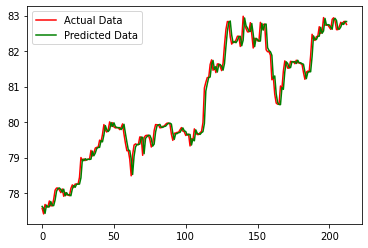

In [273]:
#evaluate usinf mean square error

plt.plot(test1,color='red', label='Actual Data')
plt.plot(pred_data,color='green', label='Predicted Data')
ax.set_xlabel('No. of Days')  # Add an x-label to the axes.
ax.set_ylabel('INR Value of 1 USD')  # Add a y-label to the axes.
ax.set_title("USD/INR : Actual vs Predicted using ARIMA Model")
plt.legend()
plt.show()


In [ ]:
print("Mean Squared Error :",mean_squared_error(test1,pred_data))
print("Accuracy Score :" ,r2_score(test1,pred_data)*100)

Mean Squared Error : 0.048435444642282506
Accuracy Score : 98.10148720160788
